In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as spst
import seaborn as sns
import time

import polyexpkde

In [2]:
rng = np.random.default_rng(12345)
X = np.vstack([rng.lognormal(size=(1000,1)), rng.normal(-5, 1, size=(500,1))])
X_eval = np.linspace(-15, 15, 10000)

gkde = spst.gaussian_kde(X.flatten(), bw_method="silverman")
gpdf = gkde.pdf(X_eval)
fkde = polyexpkde.PolyExpKernelDensity(bw_method="silverman").fit(X)
fpdf = fkde.pdf(X_eval[:, None]).flatten()

gsample = gkde.resample(100, seed=12345).flatten()
fsample = fkde.resample(100, seed=12345).flatten()

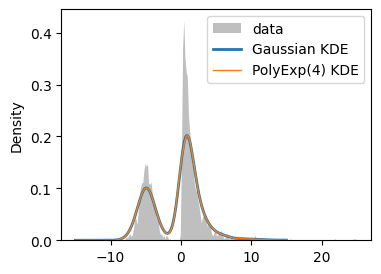

In [3]:
plt.figure(figsize=(4,3))
sns.kdeplot(X.flatten(), color = 'gray', linewidth=0, bw_adjust=0.1, alpha=0.5, fill=True, label='data');
plt.plot(X_eval, gpdf, linewidth=2, alpha=1, label='Gaussian KDE');
plt.plot(X_eval, fpdf, linewidth=1, alpha=1, label='PolyExp(4) KDE');
plt.legend();

In [4]:
n_list = [100, 300, 1000, 3000, 10000, 30000]
g_times = []
f_times = []
for n in n_list:
    x = rng.lognormal(size=(n,1))
    xf = x.flatten()
    start_time = time.time()
    gkde = spst.gaussian_kde(xf, bw_method="silverman")
    gpdf = gkde.pdf(xf)
    g_times.append(time.time() - start_time)
    start_time = time.time()
    fkde = polyexpkde.PolyExpKernelDensity(bw_method="silverman").fit(x)
    fpdf = fkde.pdf(x)
    f_times.append(time.time() - start_time)

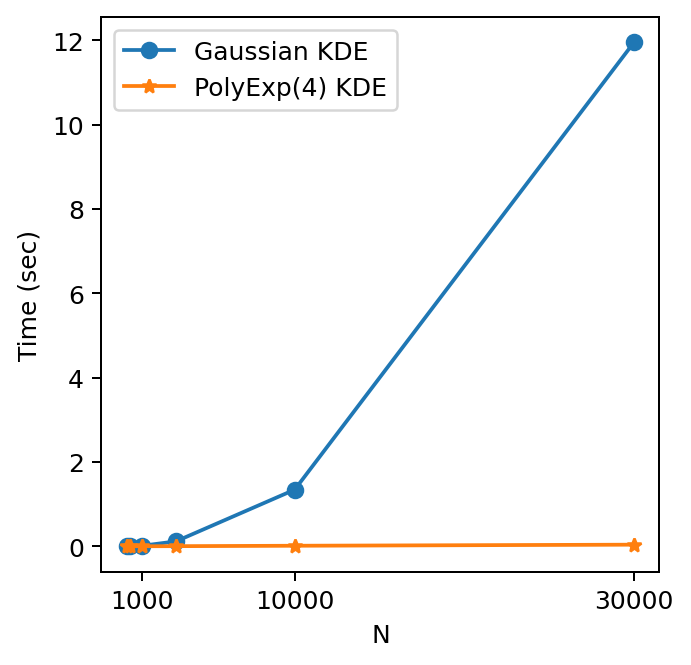

In [5]:
plt.figure(figsize=(4,4),dpi=180);
plt.plot(n_list, g_times, '-o', label='Gaussian KDE');
plt.plot(n_list, f_times, '-*', label='PolyExp(4) KDE');
plt.xlabel('N');
plt.ylabel('Time (sec)');
plt.xticks([1000, 10000, 30000],);
plt.legend();